# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

In [1]:
import numpy as np
import pandas as pd

### 01. Đọc dữ liệu

In [2]:
grades = pd.read_csv('US_BaBy_Names.csv', header=0)

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [3]:
grades.sample(10,random_state=10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
404789,2203977,2203978,Tatum,2013,M,LA,13
103685,561748,561749,Crystal,2014,F,CA,165
427107,2364428,2364429,Amiah,2005,F,MD,6
768527,4338490,4338491,Leah,2008,F,PA,294
634794,3566211,3566212,Jackeline,2007,F,NV,7
75709,533772,533773,Noor,2007,F,CA,31
985840,5488487,5488488,Janessa,2004,F,WI,16
794210,4447605,4447606,Krystal,2004,F,RI,5
188356,1056441,1056442,Katia,2006,F,FL,17
316887,1720967,1720968,Jovanny,2005,M,IL,24


### 03. Cho biết kích thước dữ liệu

In [4]:
grades.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [5]:
grades.drop(columns=['Unnamed: 0',"Id"])

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### 05. Cho biết số lượng bé trai, bé gái?

In [6]:
grades['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [7]:
(grades['Name'].value_counts()).count()

17632

### 07. Tên nào xuất hiện ít nhất?

In [8]:
counts=grades['Name'].value_counts()
counts[counts == counts.min()]


Grettell    1
Dawsen      1
Abenezer    1
Greenley    1
Daiden      1
           ..
Terryn      1
Yanna       1
Zemirah     1
Emmilyn     1
Coalton     1
Name: Name, Length: 3682, dtype: int64

### 08. Top 10 tên được sử dụng nhiều nhất?

In [9]:
grades['Name'].value_counts().nlargest(10)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64

## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

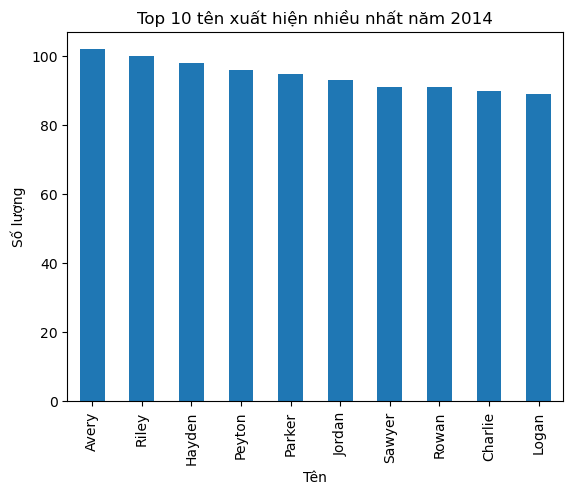

In [10]:
import matplotlib.pyplot as plt

top10_name_2014 = grades['Name'].loc[grades['Year']==2014].value_counts().nlargest(10)

top10_name_2014.plot(kind='bar')

plt.xlabel('Tên')
plt.ylabel("Số lượng")
plt.title("Top 10 tên xuất hiện nhiều nhất năm 2014")

plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

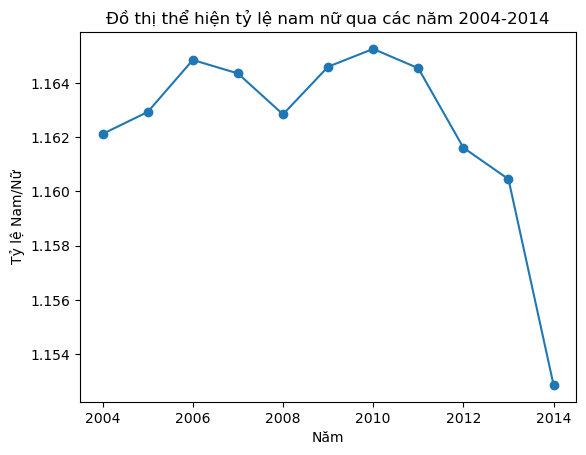

In [11]:
df = grades

# tạo pivot table để tính tổng số lượng sinh viên nam và nữ theo năm
gender_by_year = df.pivot_table(index="Year", columns="Gender", values="Count", aggfunc="sum")
# tính tỷ lệ nam/nữ trong mỗi năm
gender_by_year["Ratio"] = gender_by_year["M"] / gender_by_year["F"]
# # vẽ đồ thị
plt.plot(gender_by_year["Ratio"].loc[2004:2014], marker="o")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ Nam/Nữ")
plt.title("Đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014")
plt.show()

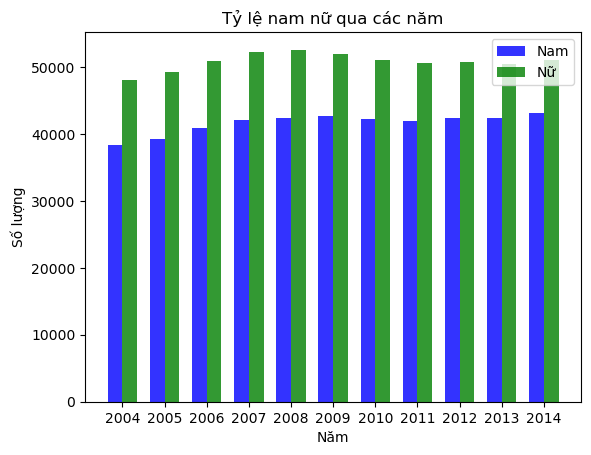

In [78]:
counts=grades['Year'].value_counts()

male=grades.loc[grades['Gender']=='M']
female=grades.loc[grades['Gender']=='F']

countsM=male['Year'].value_counts()
M=pd.DataFrame(countsM).reset_index()
M.columns = [ 'Year','Total']
M=pd.DataFrame(M.sort_values('Year'))

countsF=female['Year'].value_counts()
F=pd.DataFrame(countsF).reset_index()
F.columns = [ 'Year','Total']
F=pd.DataFrame(F.sort_values('Year'))


fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

male_bar = ax.bar(M['Year'], M['Total'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Nam')

female_bar = ax.bar([x + bar_width for x in M['Year']], F['Total'], bar_width,
                   alpha=opacity,
                   color='g',
                   label='Nữ')

ax.set_xlabel('Năm')
ax.set_ylabel('Số lượng')
ax.set_title('Tỷ lệ nam nữ qua các năm')
ax.set_xticks([x + bar_width / 2 for x in M['Year']])
ax.set_xticklabels(M['Year'])

ax.legend()
plt.show()